# Import required libraries

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split

# unpack the dataset

In [21]:
#load the dataset mnist into variable ojects which is composed of images of resolution 28 * 28 of handwritten digits
objects =  tf.keras.datasets.mnist 
# unpack and load the dataset
(training_images, training_labels),(test_images, test_labels) = objects.load_data()
#splitting  training data  into 80% for training and 20% for validation
training_images,validation_images, training_labels,validation_labels = train_test_split( training_images, training_labels, test_size=0.2)


The number of images used for training and testing

In [4]:
len(training_images )

48000

In [5]:
len(test_images)

10000

In [6]:
len(validation_images)

12000

# Sample images used in training the model

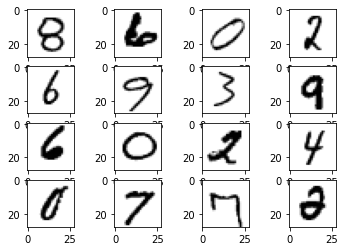

In [7]:
for i in range(16):
    plt.subplot(4,4, i + 1 )
    plt.imshow(training_images[i], cmap = plt.cm.binary)


In [9]:
print(training_images.shape)
print(training_images[0])

(48000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 255 255
   64   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  64 191 255 255 255
  255  64   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 128 255 255 255 255 255
  255 128   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  64 255 255 255 255 255 255
  255 191   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  64 19

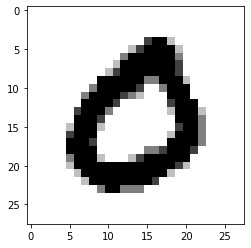

In [10]:
plt.imshow(training_images[0], cmap = plt.cm.binary)
plt.show()

# Normalization to reduce stress on computation

In [22]:
training_images  = training_images / 255.0
test_images = test_images / 255.0
validation_images = validation_images/255.0

In [12]:
print(training_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

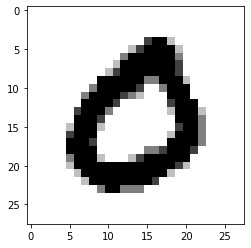

In [13]:
plt.imshow(training_images[0], cmap = plt.cm.binary)
plt.show()

# Define architecture of the model

In [23]:
# Here the architecure of the model is defined

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])



In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [26]:
# most go to optimizer is adam, others include stochastic gradient descent
# we gonna calcluate losses using sparse categorica _crossentropy if it were two classes maybe binary categorical crossentropy
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [29]:
# validation_images

# Training

In [30]:
# model.fit(training_images, training_labels, epochs=5)
history = model.fit(training_images, training_labels, epochs=10, validation_data = (validation_images, validation_labels))

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2776 - accuracy: 0.9211 - val_loss: 0.1520 - val_accuracy: 0.9548
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1224 - accuracy: 0.9635 - val_loss: 0.1058 - val_accuracy: 0.9695
Epoch 3/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0837 - accuracy: 0.9755 - val_loss: 0.0994 - val_accuracy: 0.9700
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0630 - accuracy: 0.9811 - val_loss: 0.0854 - val_accuracy: 0.9736
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0502 - accuracy: 0.9849 - val_loss: 0.0830 - val_accuracy: 0.9747
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0394 - accuracy: 0.9880 - val_loss: 0.0813 - val_accuracy: 0.9761
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0298 - accuracy: 0.9913 - val_loss: 0.0936 - val_accuracy:

In [31]:
history.history

{'loss': [0.27758193016052246,
  0.12235883623361588,
  0.08366620540618896,
  0.06299566477537155,
  0.050163425505161285,
  0.03937700018286705,
  0.0298154316842556,
  0.024738173931837082,
  0.020272420719265938,
  0.015599117614328861],
 'accuracy': [0.9210833311080933,
  0.9635208249092102,
  0.9755416512489319,
  0.981124997138977,
  0.9848750233650208,
  0.9880208373069763,
  0.9912708401679993,
  0.9929583072662354,
  0.9940000176429749,
  0.9956041574478149],
 'val_loss': [0.15202660858631134,
  0.10582894086837769,
  0.09940899908542633,
  0.08542663604021072,
  0.08295569568872452,
  0.08134876191616058,
  0.09355990588665009,
  0.0829014852643013,
  0.08922747522592545,
  0.08965566754341125],
 'val_accuracy': [0.9548333287239075,
  0.9695000052452087,
  0.9700000286102295,
  0.9735833406448364,
  0.9747499823570251,
  0.9760833382606506,
  0.9735000133514404,
  0.9774166941642761,
  0.9768333435058594,
  0.9769999980926514]}

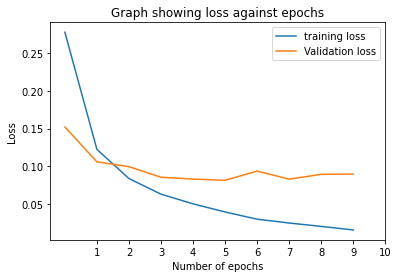

In [34]:
plt.plot(history.history['loss'], label="training loss" )
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Graph showing loss against epochs')
plt.xlabel('Number of epochs')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.ylabel('Loss')
plt.legend()
plt.show()

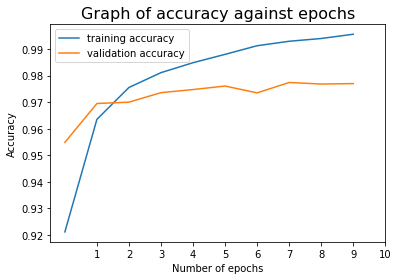

In [36]:
plt.plot(history.history['accuracy'], label="training accuracy" )
plt.plot(history.history['val_accuracy'], label="validation accuracy" )
plt.title('Graph of accuracy against epochs', fontdict={'fontsize':16})
plt.xlabel('Number of epochs')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model evaluation

In [37]:

print(model.evaluate(test_images,test_labels))

313/313 [==============================] - 1s 2ms/step - loss: 0.0906 - accuracy: 0.9785
[0.09062570333480835, 0.9785000085830688]


In [38]:
pnine = model.predict(test_images[339].reshape(-1,28,28))
test_labels[339], pnine.argmax(axis=1), pnine.max(axis=1)

(6, array([6], dtype=int64), array([0.9837583], dtype=float32))

In [39]:
#Getting 6
six_imgs, six_labels = [], []

counter = 0

for i in range(test_images.shape[0]):
    if test_labels[i] == 6:
        six_imgs.append(test_images[i])
        six_labels.append(test_labels[i])
        print(i)
        counter +=1
    if counter ==10:
        break;

len(six_imgs), len(six_labels)


11
21
22
50
54
66
81
88
91
98


(10, 10)

In [40]:
#Getting 4
four_imgs, four_labels = [], []

counter = 0

for i in range(test_images.shape[0]):
    if test_labels[i] == 4:
        print(i)
        four_imgs.append(test_images[i])
        four_labels.append(test_labels[i])
        counter +=1
    if counter ==10:
        break;

len(four_imgs), len(four_labels)

4
6
19
24
27
33
42
48
49
56


(10, 10)

In [29]:
#Getting 9 
nine_imgs, nine_labels = [], []

counter = 0

for i in range(test_images.shape[0]):
    if test_labels[i] == 9:
        print(i)
        nine_imgs.append(test_images[i])
        nine_labels.append(test_labels[i])
        counter +=1
    if counter ==10:
        break;

len(nine_imgs), len(nine_labels)

32
50
60
68
91
93
94
116
137
159


(10, 10)

In [41]:
pnine[0][8]
print(pnine[0])

[4.3757055e-08 5.9585599e-09 8.2471232e-08 4.8249821e-10 8.9376860e-11
 1.6240288e-02 9.8375827e-01 8.8861148e-11 1.3270105e-06 1.4337837e-11]


<BarContainer object of 10 artists>

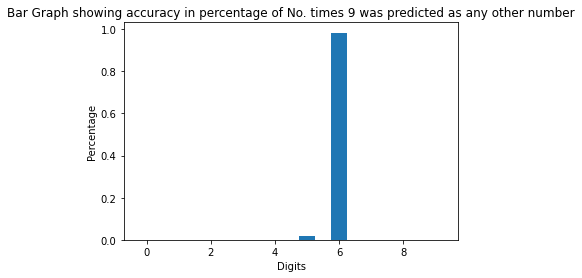

In [42]:
# help(plt.bar)
#Predicting 9
plt.title("Bar Graph showing accuracy in percentage of No. times 9 was predicted as any other number")
plt.ylabel('Percentage')
plt.xlabel('Digits')

plt.bar([i for i in range(0, len(pnine[0]))],pnine[0], width=0.5) 

In [43]:
#predicting digit 6
psix = model.predict(test_images[8].reshape(-1,28,28))
test_labels[8], psix.argmax(axis=1), psix.max(axis=1)

(5, array([5], dtype=int64), array([0.8390847], dtype=float32))

<BarContainer object of 10 artists>

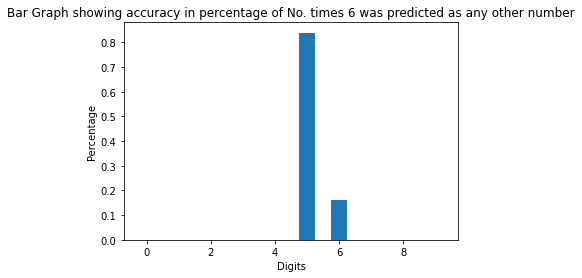

In [44]:
plt.title("Bar Graph showing accuracy in percentage of No. times 6 was predicted as any other number")
plt.ylabel('Percentage')
plt.xlabel('Digits')

plt.bar([i for i in range(0, len(psix[0]))],psix[0], width=0.5) 

In [45]:
pfour = model.predict(test_images[7].reshape(-1,28,28))
test_labels[7], pfour.argmax(axis=1), pfour.max(axis=1)

(9, array([9], dtype=int64), array([0.9990349], dtype=float32))

<BarContainer object of 10 artists>

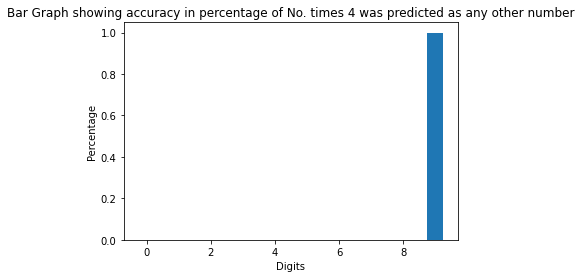

In [47]:
plt.title("Bar Graph showing accuracy in percentage of No. times 4 was predicted as any other number")
plt.ylabel('Percentage')
plt.xlabel('Digits')

plt.bar([i for i in range(0, len(pfour[0]))],pfour[0], width=0.5) 

In [49]:
import seaborn as sns
from sklearn.metrics import confusion_matrix , accuracy_score , recall_score ,precision_score

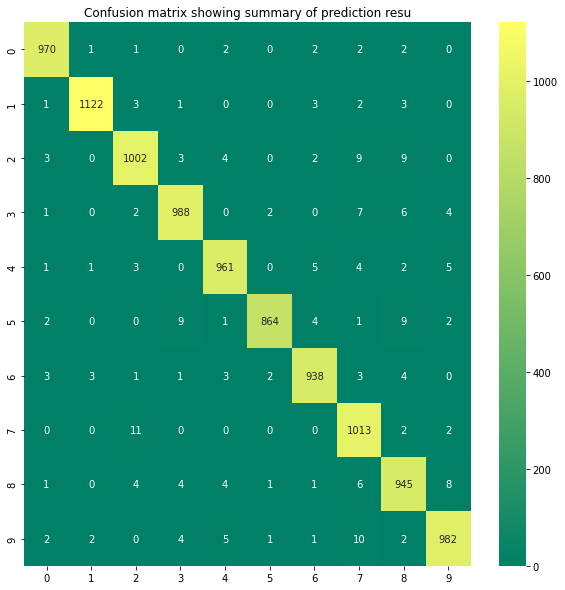

In [51]:
arr = confusion_matrix(test_labels , np.argmax(model.predict(test_images) , axis =1))

plt.figure(figsize=(10 , 10))
sns.heatmap(arr ,
            cmap = 'summer',
            fmt ='g',
            annot=True 
            )
plt.title("Confusion matrix showing summary of prediction resu")
plt.show()

In [52]:
model.save('mnist_grp1.model')

INFO:tensorflow:Assets written to: mnist_grp1.model\assets


In [54]:
saved_model = tf.keras.models.load_model('mnist_grp1.model')